In [3]:
import torch
import torch.nn as nn # torch.nn gives the nn.Module(), nn.Embedding() and nn.Linear()
import torch.nn.functional as F # Has the RELU activation functional

import matplotlib.pyplot as plt
import seaborn as sns
from torch.optim import SGD 

import lightning as L
from torch.utils.data import TensorDataset, DataLoader

In [2]:
pip install lightning

   ---------------------------------------- 0.0/828.5 kB ? eta -:--:--
   ------------------------------------- -- 786.4/828.5 kB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 828.5/828.5 kB 4.5 MB/s  0:00:00
   ---------------------------------------- 0.0/983.2 kB ? eta -:--:--
   ---------------------------------------- 983.2/983.2 kB 5.8 MB/s  0:00:00
   ---------------------------------------- 0.0/832.4 kB ? eta -:--:--
   ---------------------------------------- 832.4/832.4 kB 7.3 MB/s  0:00:00

   ----------------------------------------  0/13 [tqdm]
   --- ------------------------------------  1/13 [propcache]
   --------- ------------------------------  3/13 [lightning-utilities]
   --------------- ------------------------  5/13 [attrs]
   --------------------- ------------------  7/13 [yarl]
   --------------------------- ------------  9/13 [torchmetrics]
   --------------------------- ------------  9/13 [torchmetrics]
   --------------------------- --------

# Initalize our training data

In [ ]:
# Inputs are the x-axis coordinates for each data point
training_inputs = torch.tensor([0.0, 0.5, 1.0])

#Labels are the y-axis coordinates for each data point
training_labels = torch.tensor([0.0, 1.0, 0.0])

#Putting everything into a data loader (More computationally efficient)
training_dataset = TensorDataset(training_inputs, training_labels)
dataloader = DataLoader(training_dataset)

# Create a class of our Neural Network with random parameters

In [7]:
# We will inherit from Ligtning modu8le. It has everythin nn has including the ability to define the optimizer

class myNN(L.LightningModule):

    def __init__(self):
        super().__init__()

        self.w1 = nn.Parameter(torch.tensor(0.06))
        self.b1 = nn.Parameter(torch.tensor(0.0))

        self.w2 = nn.Parameter(torch.tensor(3.49))
        self.b2 = nn.Parameter(torch.tensor(0.0))

        self.w3 = nn.Parameter(torch.tensor(-4.11))
        self.w4 = nn.Parameter(torch.tensor(2.74))

        self.loss = nn.MSELoss(reduction='sum') # Use SSR as the loss function for the neural network

    def forward(self, input_values):

        top_x_axis_values = (input_values * self.w1) + self.b1
        bottom_x_axis_values = (input_values * self.w2) + self.b2

        top_y_axis_values = F.relu(top_x_axis_values)
        bottom_y_axis_values = F.relu(bottom_x_axis_values)

        output_values = (top_y_axis_values * self.w3) + (bottom_y_axis_values * self.w4)

        return output_values
    
    def configure_optimizers(self): # Method that lets us choose the optimizer we want for backward propagation
        return SGD(self.parameters(), lr = 0.01)
    
    def training_step(self, batch, batch_idx): # calculates loss using the following code

        inputs, labels = batch # Colect input
        outputs = self.forward(inputs) # Run the input through the neural network
        loss = self.loss(outputs, labels) # Gets the difference between the observed and those predicted by the neural network

        return loss
    

# Seeing how badly an untrained model with random parameters fits out data

In [ ]:
# Make an instance of my class
model = myNN()

# Print the parameters in our network
for name, param in model.named_parameters():
    print(name, torch.round(param.data, decimals = 2))

w1 tensor(0.0600)
b1 tensor(0.)
w2 tensor(3.4900)
b2 tensor(0.)
w3 tensor(-4.1100)
w4 tensor(2.7400)


In [ ]:
# run the doses through the neural network
output_values = model(training_inputs)
torch.round(output_values, decimals = 2)

tensor([0.0000, 4.6600, 9.3200], grad_fn=<RoundBackward1>)

In [12]:
# The effectiveness values produced from the model are very different from the training data.
#  We will draw a graph to see how the current untrained model with random parameters fits out data

input_doses = torch.linspace(start = 0, end = 1, steps = 11)

input_doses

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

In [13]:
# Putting random data through the model to plot
output_values = model(input_doses)

output_values

tensor([0.0000, 0.9316, 1.8632, 2.7948, 3.7264, 4.6580, 5.5896, 6.5212, 7.4528,
        8.3844, 9.3160], grad_fn=<AddBackward0>)

Text(0, 0.5, 'Effectiveness')

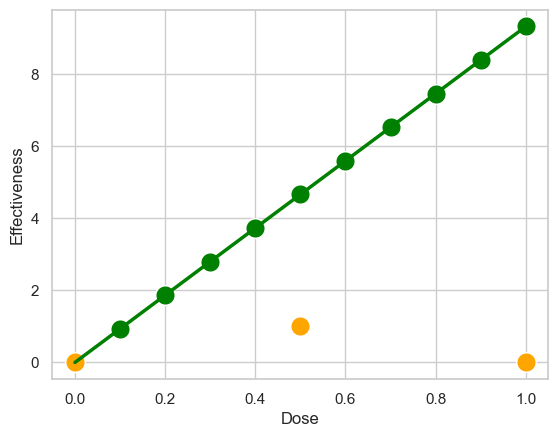

In [16]:
# The graph should fit the data poorly as we have not trained the model yet

sns.set(style = 'whitegrid')

sns.scatterplot(x = input_doses,
                y = output_values.detach().numpy(),
                color = 'green',
                s = 200
                )

sns.lineplot(x = input_doses,
             y = output_values.detach().numpy(),
            color = 'green',
            linewidth = 2.5 )

# Data in the training data

sns.scatterplot( x = training_inputs,
                y = training_labels,
                color = 'orange',
                s = 200
)
plt.xlabel('Dose')
plt.ylabel('Effectiveness')

# Training the Weights and Biases of the Neural Network

In [ ]:
model = myNN()

#Train using L.trainer and the fit method

trainer = L.Trainer(max_epochs = 500, # Go thorugh training data 500 times
                    logger = False,
                    enable_checkpointing = False,
                    enable_progress_bar = False)

trainer.fit(model, train_dataloaders = dataloader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type    | Params | Mode 
-------------------------------------------------
0 | loss         | MSELoss | 0      | train
  | other params | n/a     | 6      | n/a  
-------------------------------------------------
6         Trainable params
0         Non-trainable params
6         Total params
0.000     Total estimated model params size (MB)
1         Modules in train mode
0         Modules in eval mode
c:\Users\Taylor.Odhiambo\OneDrive - Kenya Airways PLC\Documents\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
`Trainer.fit` stopped: `max_epochs=500` reached.


In [19]:
for name, param in model.named_parameters():
    print(name, torch.round(param.data, decimals = 3))

w1 tensor(1.4790)
b1 tensor(-0.5680)
w2 tensor(2.6980)
b2 tensor(-0.2580)
w3 tensor(-4.2400)
w4 tensor(1.5830)


# Comparing our new trained model to training data

In [20]:
output_values = model(input_doses)
torch.round(output_values, decimals = 2)

tensor([0.0000, 0.0200, 0.4500, 0.8700, 1.2000, 1.0000, 0.8000, 0.6000, 0.4000,
        0.2000, 0.0000], grad_fn=<RoundBackward1>)

Text(0.5, 0, 'Dose')

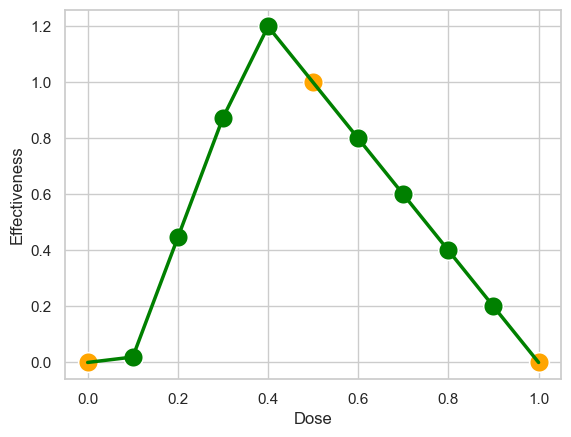

In [21]:
sns.set(style = 'whitegrid')

sns.scatterplot(x = input_doses,
                y = output_values.detach().numpy(),
                color = 'green',
                s = 200)

sns.lineplot(x = input_doses,
             y = output_values.detach().numpy(),
             color = 'green',
             linewidth = 2.5)

# Plot what we have in the training data

sns.scatterplot(x = training_inputs,
                y = training_labels,
                color = 'orange',
                s = 200)

plt.ylabel('Effectiveness')
plt.xlabel('Dose')